In [1]:
# Dependencies
import pandas as pd
import nfl_data_py as nfl
import os
import urllib.request
import get_logos

# MPL Dependencies
from matplotlib import style
import matplotlib.pyplot as plt
import matplotlib.lines
from matplotlib.transforms import Bbox, TransformedBbox
from matplotlib.legend_handler import HandlerBase
from matplotlib.image import BboxImage

In [21]:
# Define the matchup parameters
year = 2018
week = '01'
away_team = 'CHI'
home_team = 'GB'

In [ ]:
# Use the get logos function
logo_df = get_logos.get_logos()

In [23]:
# Load the NFL 2022 PBP data
pbp_df = nfl.import_pbp_data([year])

2018 done.
Downcasting floats.


In [24]:
pbp_df

,play_id,game_id,old_game_id,home_team,away_team,season_type,week,posteam,posteam_type,defteam,...,offense_formation,offense_personnel,defenders_in_box,defense_personnel,number_of_pass_rushers,players_on_play,offense_players,n_offense,defense_players,n_defense
0,1.0,2018_01_ATL_PHI,2018090600,PHI,ATL,REG,1,None,None,None,...,None,None,NaN,None,NaN,,,0,,0
1,37.0,2018_01_ATL_PHI,2018090600,PHI,ATL,REG,1,ATL,away,PHI,...,None,None,NaN,None,NaN,44987;46263;45070;42515;42450;45599;34465;4040...,00-0031950;00-0033725;00-0026990;00-0029955;00...,11,00-0033576;00-0034411;00-0033222;00-0031570;00...,11
2,52.0,2018_01_ATL_PHI,2018090600,PHI,ATL,REG,1,ATL,away,PHI,...,None,"2 RB, 1 TE, 2 WR",NaN,"4 DL, 2 LB, 5 DB",NaN,34502;44826;41232;34465;34472;43522;35722;3545...,00-0027027;00-0031279;00-0026997;00-0027215;00...,11,00-0033876;00-0026990;00-0032803;00-0027865;00...,11
3,75.0,2018_01_ATL_PHI,2018090600,PHI,ATL,REG,1,ATL,away,PHI,...,I_FORM,"2 RB, 1 TE, 2 WR",7.0,"4 DL, 2 LB, 5 DB",4.0,34502;44826;41232;34465;34472;43522;43370;3545...,00-0027027;00-0031279;00-0026997;00-0032392;00...,11,00-0033876;00-0026990;00-0032803;00-0027865;00...,11
4,104.0,2018_01_ATL_PHI,2018090600,PHI,ATL,REG,1,ATL,away,PHI,...,I_FORM,"2 RB, 1 TE, 2 WR",7.0,"4 DL, 2 LB, 5 DB",NaN,34502;44826;41232;34465;34472;43522;35722;3545...,00-0027027;00-0031279;00-0026997;00-0027215;00...,11,00-0033876;00-0026990;00-0032803;00-0027865;00...,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47869,4217.0,2018_21_NE_LA,2019020300,LA,NE,POST,21,LA,home,NE,...,SHOTGUN,"1 RB, 1 TE, 3 WR",3.0,"2 DL, 2 LB, 7 DB",3.0,43290;38540;46312;33268;44856;38555;35466;4353...,,0,,0
47870,4242.0,2018_21_NE_LA,2019020300,LA,NE,POST,21,LA,home,NE,...,None,"1 RB, 1 TE, 3 WR",4.0,"2 DL, 2 LB, 7 DB",0.0,38540;43290;46312;33268;44856;38555;35466;4353...,,0,,0
47871,4264.0,2018_21_NE_LA,2019020300,LA,NE,POST,21,LA,home,NE,...,None,None,NaN,None,NaN,37874;42355;38555;35466;38815;43537;45274;3870...,,0,,0
47872,4284.0,2018_21_NE_LA,2019020300,LA,NE,POST,21,NE,away,LA,...,None,"2 RB, 2 TE, 1 WR",8.0,"4 DL, 3 LB, 3 DB",NaN,44903;41270;36473;42883;42816;33234;44938;3859...,,0,,0


In [25]:
# Filter down to a single game
pbp_df = pbp_df[pbp_df['game_id'] == f'{year}_{week}_{away_team}_{home_team}']

# Filter down to necessary columns
pbp_df = pbp_df[['posteam', 'game_seconds_remaining', 'away_wp', 'home_wp']]

# Rename posteam to team_abbr
pbp_df = pbp_df.rename(columns={'posteam':'team_abbr'})

In [26]:
# Join logo_df on pbp_df to get colors and logos
vis_df = pd.merge(pbp_df, logo_df)
vis_df

,team_abbr,game_seconds_remaining,away_wp,home_wp,logo_path,team_color
0,GB,3600.0,0.453738,0.546262,logos/GB.tif,#203731
1,GB,3600.0,0.453738,0.546262,logos/GB.tif,#203731
2,GB,3563.0,0.471970,0.528030,logos/GB.tif,#203731
3,GB,3523.0,0.427427,0.572573,logos/GB.tif,#203731
4,GB,3517.0,0.445463,0.554537,logos/GB.tif,#203731
...,...,...,...,...,...,...
159,CHI,99.0,0.473353,0.526647,logos/CHI.tif,#0B162A
160,CHI,78.0,0.514165,0.485835,logos/CHI.tif,#0B162A
161,CHI,75.0,0.473589,0.526411,logos/CHI.tif,#0B162A
162,CHI,70.0,0.375874,0.624126,logos/CHI.tif,#0B162A


In [27]:
# Define home and away color variables
away_color = vis_df[vis_df['team_abbr'] == away_team].iloc[0]['team_color']
home_color = vis_df[vis_df['team_abbr'] == home_team].iloc[0]['team_color']

# Define home and away logo paths
away_path = str(vis_df[vis_df['team_abbr'] == away_team].iloc[0]['logo_path'])
home_path = str(vis_df[vis_df['team_abbr'] == home_team].iloc[0]['logo_path'])

In [28]:
class HandlerLineImage(HandlerBase):

    def __init__(self, path, space=15, offset = 10 ):
        self.space=space
        self.offset=offset
        self.image_data = plt.imread(path)
        super(HandlerLineImage, self).__init__()

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height, fontsize, trans):

        l = matplotlib.lines.Line2D([xdescent+self.offset,xdescent+(width-self.space)/3.+self.offset],
                                    [ydescent+height/2., ydescent+height/2.])
        l.update_from(orig_handle)
        l.set_clip_on(False)
        l.set_transform(trans)

        bb = Bbox.from_bounds(xdescent +(width+self.space)/3.+self.offset,
                              ydescent,
                              height*self.image_data.shape[1]/self.image_data.shape[0],
                              height)

        tbb = TransformedBbox(bb, trans)
        image = BboxImage(tbb)
        image.set_data(self.image_data)

        self.update_prop(image, orig_handle, legend)
        return [l,image]

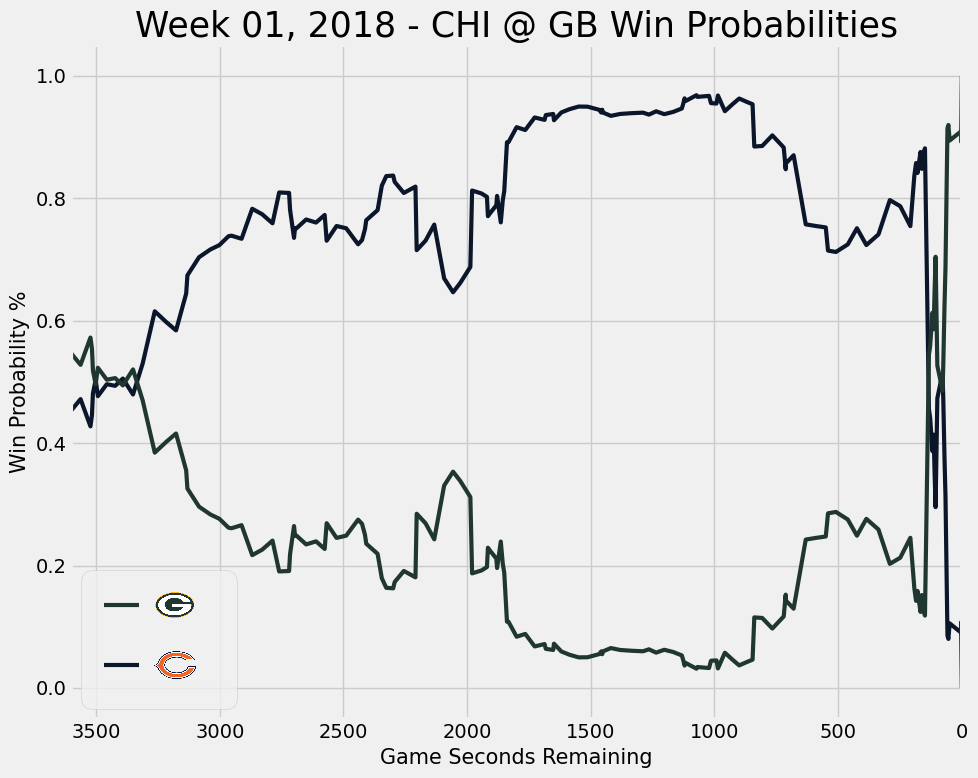

In [34]:
# Style the chart
plt.style.use('fivethirtyeight')

# Define plot size and autolayout
plt.rcParams["figure.figsize"] = [10, 8]
plt.rcParams["figure.autolayout"] = True

# Define the subplot
fig, ax = plt.subplots()

# Plot the data on the subplots
home_line, = ax.plot(
    pbp_df['game_seconds_remaining'],
    pbp_df['away_wp'],
    color=away_color,
    linewidth=3)


away_line, = ax.plot(
    pbp_df['game_seconds_remaining'],
    pbp_df['home_wp'],
    color=home_color,
    linewidth=3)

# Chart parameters
plt.title(f'Week {week}, {year} - {away_team} @ {home_team} Win Probabilities', fontdict={'fontsize':25});
plt.xlim((0,3600));
plt.xlabel("Game Seconds Remaining", {'fontsize':15});
plt.ylabel("Win Probability %", {'fontsize':15});

# Define the chart legend
plt.legend([away_line, home_line], ["", ""],
           handler_map= { home_line: HandlerLineImage(away_path), away_line: HandlerLineImage(home_path)},
           handlelength=2, labelspacing=0.0, fontsize=45, borderpad=0.15, loc=3,
           handletextpad=0.2, borderaxespad=0.15)

# Invert the x-axis so that it ends when there are 0 second remaining
ax.invert_xaxis()